**Step1: Import necessary libraries**

In [566]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

# 1. Dataset Acquisition

**Describe the DataSet.**

Source: Kaggle - Titanic dataset

Size: 891 rows × 12 columns

**The dataset contains information about Titanic passengers, such as age, gender, ticket number, price, class, and the port of embarkation. Its primary purpose is to predict who survived and who did not.**

The target: What are the factors that have affected survival?

Contents: It contains information about the 891 passengers who were on board the Titanic.

# 2. Loading Steps Efficiently:
import pandas as pd

df = pd.read_csv("Cancer.csv")


Basic Information:

df.info()


Check class distribution
df['Embarked'].values_count()

| Columns      | Describtion                                                                                     |
|--------------|-------------------------------------------------------------------------------------------------|
| PassengerId  | Passenger serial number                                                                         |
| Survived     | If the passenger survives 1 and if he dies 0                                                    |
| Pclass       | Degree                                                                                          |
| Name         | Passenger's name                                                                                |
| Sex          | Gender(male / female)                                                                           |
| Age          | Age                                                                                             |
| SibSp        | Number of Brothers / Couples on the ship                                                        |
| Parch        | Number of parents / Children on board                                                           |
| Ticket       | Ticket number                                                                                   |
| Fare         | Ticket price paid                                                                               |
| Cabin        | Cabin number(Mostly missing)                                                                    |
| Embarked     | The port from which the passenger boarded(C = "Cherbourg" , Q = "Queenstown" , S = "Southampton"8)|

# 2. Analyze the dataset.

**a. Load the dataset.**

In [567]:
file_path = "train.csv"
df = pd.read_csv(file_path)
df_clean = df.copy()
print("\nDataSet loaded successfully!\n")
df_clean


DataSet loaded successfully!



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**Display basic information**

In [568]:
print("Shape: " , df.shape)

Shape:  (891, 12)


In [569]:
print("First 5 rows of the dataset:\n")
df_clean.head()

First 5 rows of the dataset:



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [570]:
print("General information about the dataset:\n")
df_clean.info()

General information about the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


.describe() ==> This provides statistical summaries for numerical columns such as mean, std, min, and max

In [571]:
print("Summary Statistics ")
df_clean.describe()

Summary Statistics 


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [572]:
print("Columns:")
df_clean.columns.tolist()

Columns:


['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

They show whether each column is of type 'int' , 'float' , or 'object' (string / category).

In [573]:
print("\nData Types")
df_clean.dtypes


Data Types


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Calculates the percentage of each type of cancer within the column 'Embarked'

The data are roughly balanced between the species.

In [574]:
df_clean['Embarked'].value_counts(normalize=True)

Embarked
S    0.724409
C    0.188976
Q    0.086614
Name: proportion, dtype: float64

**3. Data Cleaning and Pre-processing**

        1. Handling Missing Data:

In [575]:
missing_values = df_clean.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_data_report = pd.DataFrame({'Missing Values' : missing_values , 'Percentage (%)' : missing_percent})
missing_data_report.sort_values(by='Percentage (%)' , ascending=False)

,Missing Values,Percentage (%)
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Name,0,0.000000
Pclass,0,0.000000
Survived,0,0.000000
Sex,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000


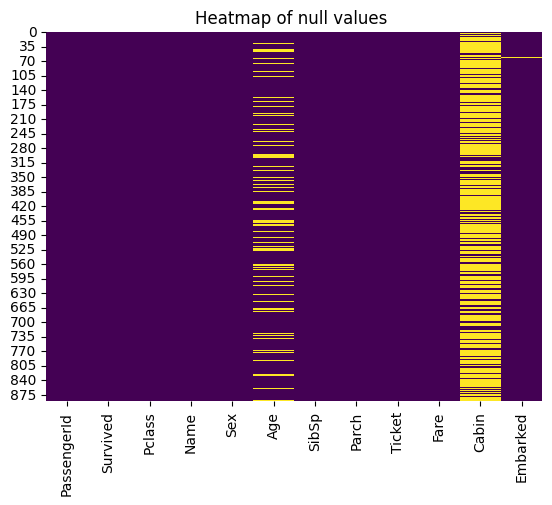

In [576]:
sns.heatmap(df_clean.isnull() , cbar=False , cmap='viridis')
plt.title("Heatmap of null values ")
plt.show()

**According to percentage:**

"Cabin"    ==> Drop it due to too many missing values.

"Embarked" ==> Fill missing values with most frequent value (mode).

"Age"      ==> Fill missing values with mean.

In [577]:
df_clean.drop('Cabin' , axis = 1 , inplace = True)

df_clean['Embarked'] = df_clean["Embarked"].fillna(df_clean['Embarked'].mode()[0])

df_clean['Age'] = df_clean['Age'].fillna(df_clean['Age'].mean())

print("\nMissing values have been handled.")


Missing values have been handled.


In [578]:
df_clean.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

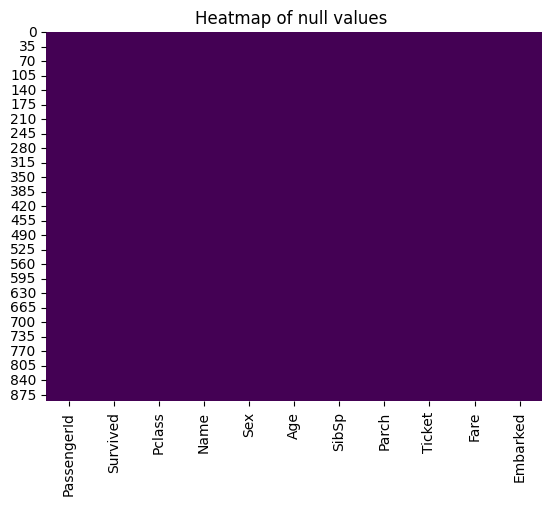

In [579]:
sns.heatmap(df_clean.isnull() , cbar=False , cmap='viridis')
plt.title("Heatmap of null values ")
plt.show()

        2. Outlier Treatment:

          Visualization with boxplots:

We notice from the boxplot:


PassengerId   : approximately evenly distributed.

Survived      : Binary variable (0 / 1) , No actual distribution appears.

Pclass        : Three categories , clear distribution.

Age           : There are outlier values.

SibSp & Parch : There are a few outliers.

Fare          : Very large outliers.

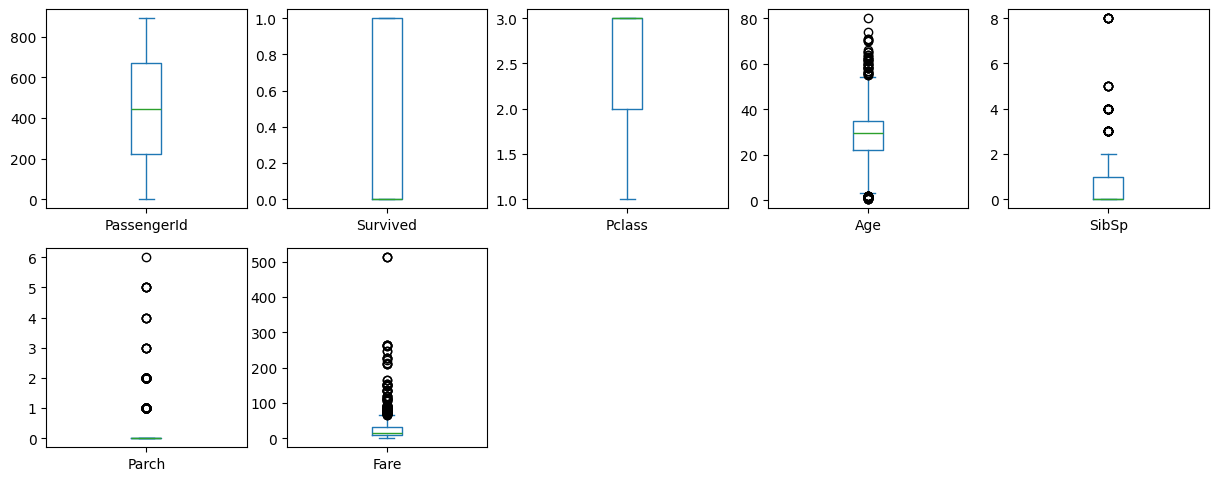

In [580]:
df_clean.plot(kind='box' , subplots=True , layout=(5,5) , figsize=(15,15) )
plt.show()

         IQR-based outlier removal:

In [581]:
cols = ['Fare' , 'SibSp' , 'Parch']

for col in cols:
    df_clean[col] = winsorize(df_clean[col] , limits=[0.05 , 0.05])  # 5% winosorization on both sides

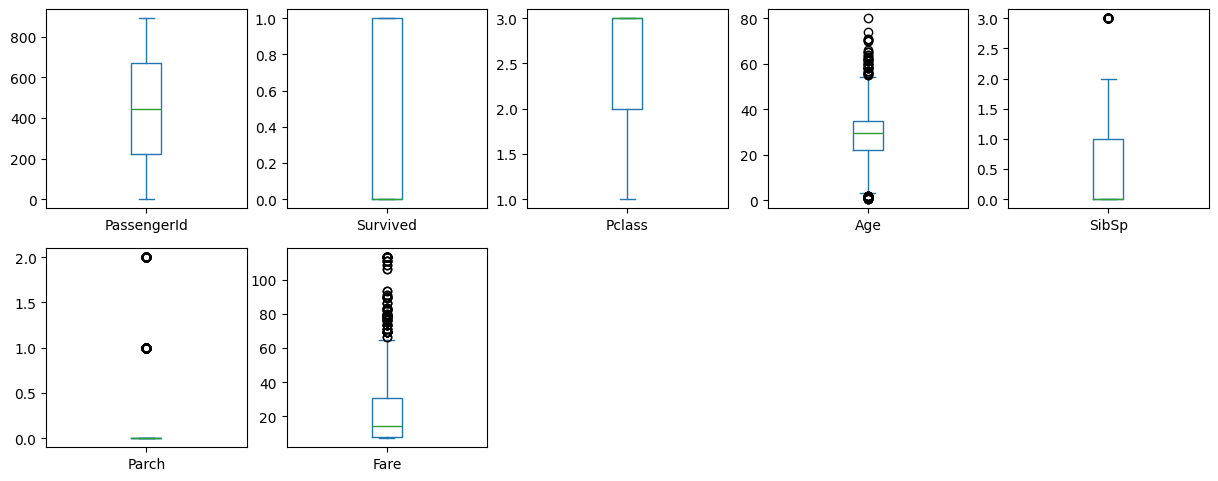

In [582]:
df_clean.plot(kind='box' , subplots=True , layout=(5,5) , figsize=(15,15) )
plt.show()

Data cleaned .

Missing values handled and outliers treated.

        4. Features Scaling / Encoding :

Encode 'Embarked' & 'Sex' columns

In [602]:
le_sex = LabelEncoder()
le_embarked = LabelEncoder()
df_clean['Sex'] = le_sex.fit_transform(df_clean['Sex'])
df_clean['Embarked'] = le_embarked.fit_transform(df_clean['Embarked'])

Scale 'Age' & 'Fare'

In [584]:
scaler = StandardScaler()
df_clean[['Age' , 'Fare']] = scaler.fit_transform(df_clean[['Age' , 'Fare']])

         5. Demonstrate impact

Compare before and after:

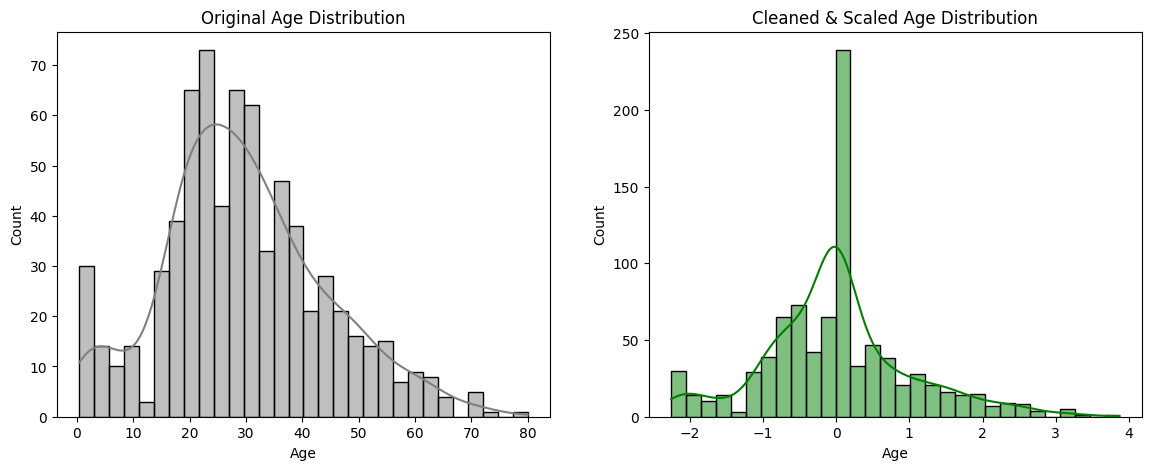

In [585]:
fig , ax = plt.subplots(1,2,figsize=(14,5))
sns.histplot(df['Age'] , bins=30 , kde=True , ax=ax[0] , color='gray')
ax[0].set_title('Original Age Distribution')
sns.histplot(df_clean['Age'] , bins=30 , kde=True , ax=ax[1] , color='green')
ax[1].set_title('Cleaned & Scaled Age Distribution')
plt.show()

Cleaning Summary:


Dropped Columns: 'Cabin'

Imputation: 'Age'      ==> Mean Imputation

            'Embarked' ==> Most Frequent (Mode) Imputation


Outlier Treatment: 'Fare' , 'SibSp' , 'Parch' Winsorization 


Encoding: 'Sex'      ==> Label Encoding (male=1 , famale=0) 

          'Embarked' ==> Label Encoding (C=0 , Q=1 , S=2 )


Scaling: 'Age' , 'Fare' ==> Standard Scaler

In [586]:
df_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.592481,1,0,A/5 21171,-0.706066,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.638789,1,0,PC 17599,1.481461,0
2,3,1,3,"Heikkinen, Miss. Laina",0,-0.284663,0,0,STON/O2. 3101282,-0.683006,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.407926,1,0,113803,0.860277,2
4,5,0,3,"Allen, Mr. William Henry",1,0.407926,0,0,373450,-0.678736,2


Statistical Modeling: Logistic Regression.


Why?

The target variable Survived is binary: 0 (Died) , 1 (Survived)

Logistic Regression is designed for classification

Train/Test Split:

Training(80%): to train the model.

Testing(20%): to evaluate performance.

In [587]:
features = ['Pclass' , 'Sex' , 'Age' , 'SibSp' , 'Parch' , 'Fare' , 'Embarked']

x = df_clean[features]
y = df_clean['Survived']

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(x_train , y_train)
y_pred = model.predict(x_test)

In [588]:
coeff_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)


print("Accuracy: " , accuracy_score(y_test , y_pred))
print("\nConfusion Matrix:\n" , confusion_matrix(y_test , y_pred))
print("\nClassifiction Report:\n" , classification_report(y_test , y_pred , output_dict=True))

coeff_df

Accuracy:  0.8044692737430168

Confusion Matrix:
 [[89 16]
 [19 55]]

Classifiction Report:
 {'0': {'precision': 0.8240740740740741, 'recall': 0.8476190476190476, 'f1-score': 0.8356807511737089, 'support': 105.0}, '1': {'precision': 0.7746478873239436, 'recall': 0.7432432432432432, 'f1-score': 0.7586206896551724, 'support': 74.0}, 'accuracy': 0.8044692737430168, 'macro avg': {'precision': 0.7993609806990088, 'recall': 0.7954311454311453, 'f1-score': 0.7971507204144406, 'support': 179.0}, 'weighted avg': {'precision': 0.8036409018980425, 'recall': 0.8044692737430168, 'f1-score': 0.8038235190375541, 'support': 179.0}}


,Feature,Coefficient
1,Sex,-2.563034
0,Pclass,-0.941771
2,Age,-0.397702
3,SibSp,-0.337212
6,Embarked,-0.241795
5,Fare,0.101724
4,Parch,-0.062512


**Summary of insights:**

Sex is the most influential variable. Females had significantly higher survival chances.

Pclass plays a critical role — 1st class survival rate is highest.

Passengers with higher fare were more likely to survive.

Children and younger adults also had better survival rates. 

**Surprising Patterns:**

Even among 3rd class passengers, some survived, indicating other factors (like age/gender) mattered.

SibSp and Parch (family aboard) slightly reduced chances of survival when high.

**Limitations**

Dataset is relatively small (891 rows).

Many fields like 'Cabin' have missing values and were dropped.

Logistic Regression assumes linear relationships - may miss complex patterns.

**Future Work**

Use feature engineering like creating new columns from the existing data to give the model more meaningful information.


**Exploratory Data Analysis - EDA**

pie chart , bar plot , histograms , boxplot , correlation heatmap

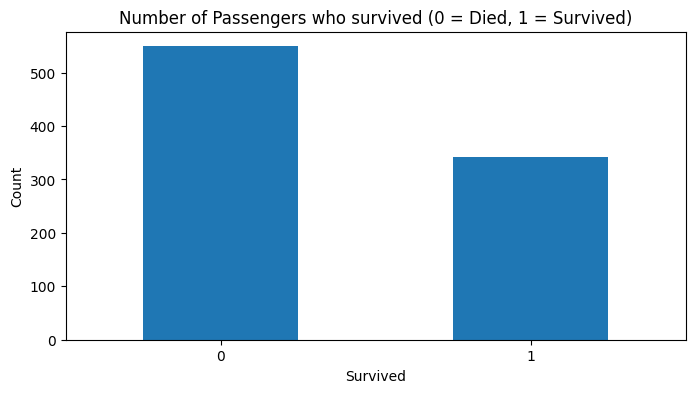

In [589]:
plt.figure(figsize=(8,4))
df['Survived'].value_counts().plot(kind='bar')
plt.title("Number of Passengers who survived (0 = Died, 1 = Survived)")
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

**Age Distribution**

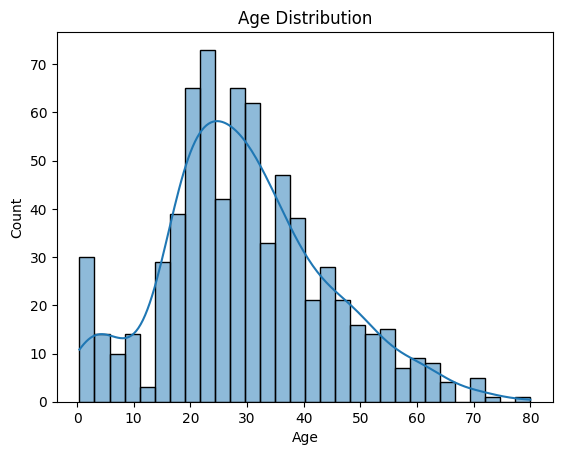

In [590]:
sns.histplot(data=df , x='Age' , bins=30 , kde=True)
plt.title("Age Distribution")
plt.show()

**Does sex affect survival?**

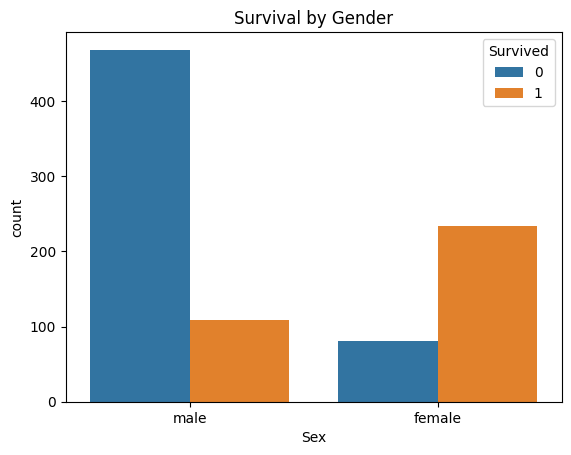

In [591]:
sns.countplot(data=df , x='Sex' , hue='Survived')
plt.title('Survival by Gender')
plt.show()

**Did the degree (Pclass) affect survival?**

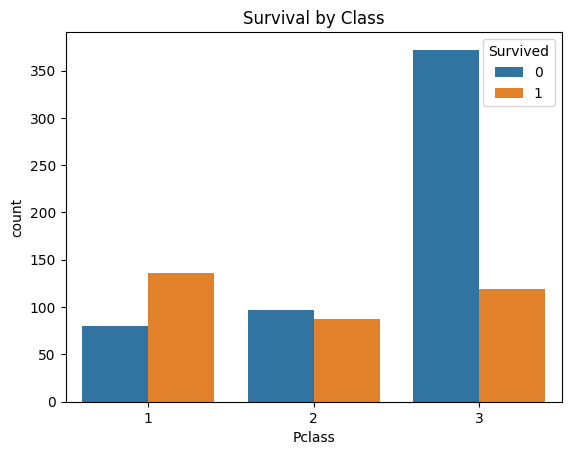

In [592]:
sns.countplot(data=df , x='Pclass' , hue='Survived')
plt.title('Survival by Class')
plt.show()

Age vs. Survival

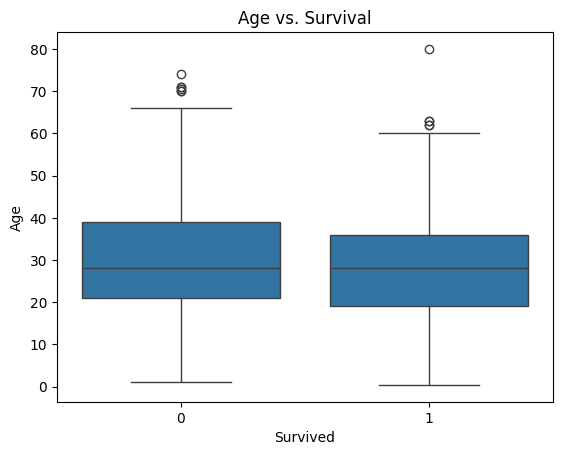

In [593]:
sns.boxplot(data=df , x='Survived' , y='Age')
plt.title("Age vs. Survival")
plt.show()

**Does the price (Fare) have an effect?**

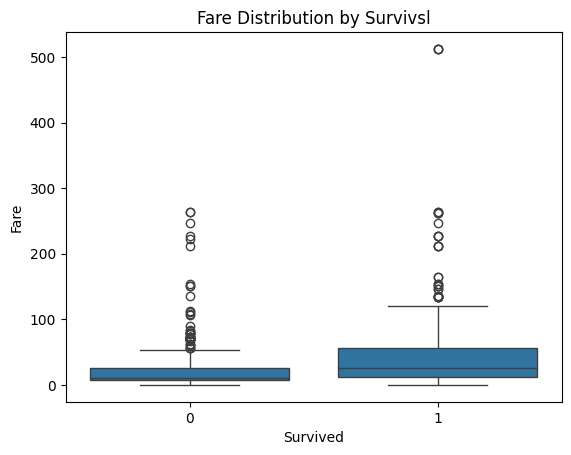

In [594]:
sns.boxplot(data=df , x='Survived' , y='Fare')
plt.title('Fare Distribution by Survivsl')
plt.show()

How many people are in every age group?

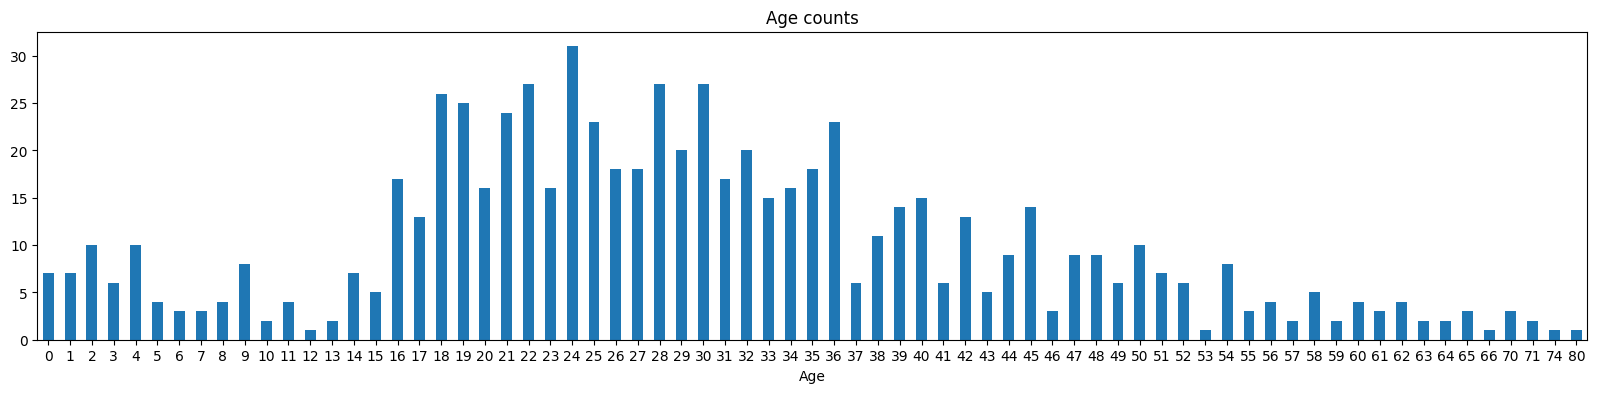

In [595]:
df['Age'].dropna().astype(int).value_counts().sort_index().plot(kind='bar' , figsize=(20,4) , rot=0)
plt.title("Age counts")
plt.show()

**What is the age distribution? Does it differ according to survival?**

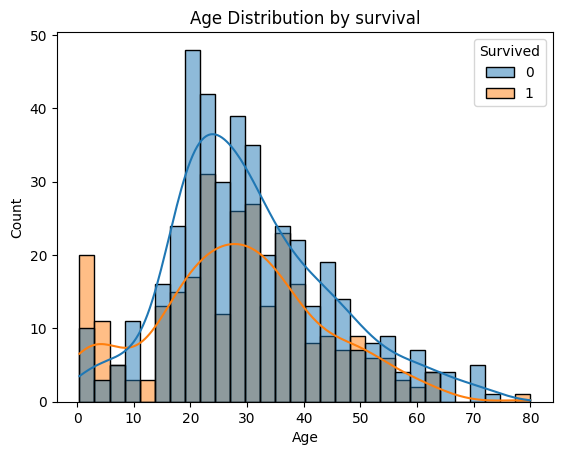

In [596]:
sns.histplot(data=df , x='Age' , hue='Survived' , bins=30 , kde=True)
plt.title('Age Distribution by survival')
plt.show()

Does the Embarked have an impact on survival?

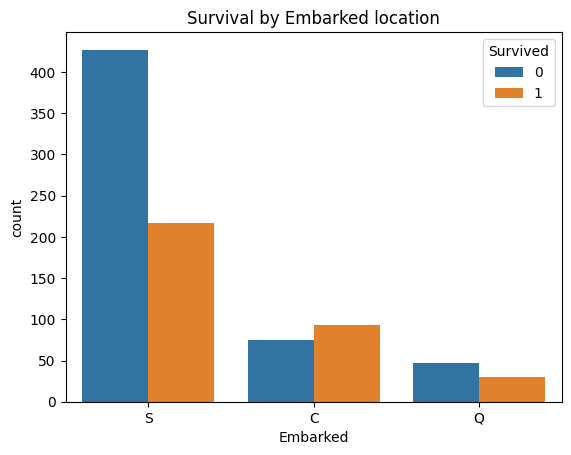

In [597]:
sns.countplot(data=df , x='Embarked' , hue='Survived')
plt.title("Survival by Embarked location")
plt.show()

The relationship between the number of the Siblings/Spouse and travels with his family and survival ?

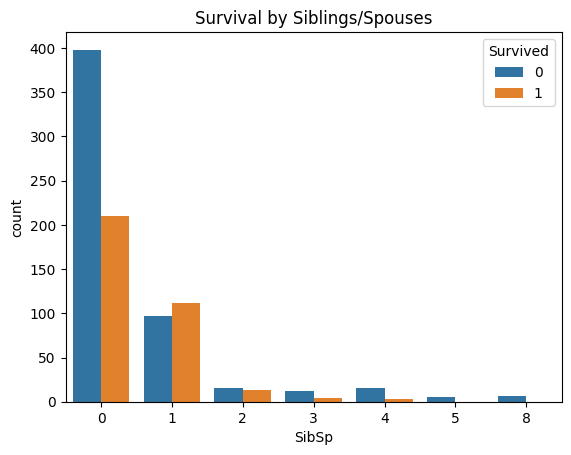

In [598]:
sns.countplot(data=df , x='SibSp' , hue='Survived')
plt.title("Survival by Siblings/Spouses")
plt.show()

Heatmap of correlation between numerical columns

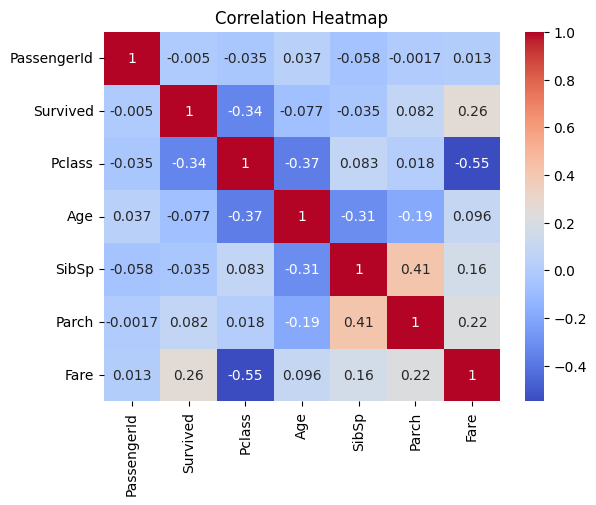

In [599]:
sns.heatmap(df.corr(numeric_only=True) , annot=True , cmap='coolwarm' )
plt.title('Correlation Heatmap')
plt.show()